# Banana with Double DQN

For more explanations and instructions, see README.md file in this folder.
## Set up the environment

In [1]:
from unityagents import UnityEnvironment
import numpy as np

import gym
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
env = UnityEnvironment(file_name="/Users/heejung/deepRL/deep-rl/dqn/Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

## Insepct the state and action spaces

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [0.         1.         0.         0.         0.16895212 0.
 1.         0.         0.         0.20073597 1.         0.
 0.         0.         0.12865657 0.         1.         0.
 0.         0.14938059 1.         0.         0.         0.
 0.58185619 0.         1.         0.         0.         0.16089135
 0.         1.         0.         0.         0.31775284 0.
 0.        ]
States have length: 37


## Train

In [6]:
def dqn(agent, brain_name, n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        agent (DoubleDqnAgent): Double DQN Agent to train
        brain_name (string): Brain name of the environment
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]            # get the current state
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
            score += reward                                # update the score
            state = next_state                             # roll over the state to next time step
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
    return scores

In [9]:
from double_dqn_agent import DoubleDqnAgent

ddqn_agent = DoubleDqnAgent(state_size=37, action_size=4, seed=0, fc1_size=64, fc2_size=64)
scores = dqn(ddqn_agent, brain_name)

# print("Score: {}".format(score))

Episode 100	Average Score: 0.56
Episode 200	Average Score: 3.80
Episode 300	Average Score: 8.08
Episode 400	Average Score: 9.73
Episode 500	Average Score: 12.59
Episode 600	Average Score: 13.15
Episode 700	Average Score: 12.53
Episode 800	Average Score: 13.90
Episode 900	Average Score: 15.46
Episode 1000	Average Score: 15.69
Episode 1100	Average Score: 15.24
Episode 1200	Average Score: 15.12
Episode 1300	Average Score: 13.99
Episode 1400	Average Score: 14.56
Episode 1500	Average Score: 14.62
Episode 1600	Average Score: 15.06
Episode 1700	Average Score: 14.12
Episode 1800	Average Score: 14.69
Episode 1900	Average Score: 13.37
Episode 2000	Average Score: 14.11


NameError: name 'score' is not defined

The environment is solved in 500 episodes.

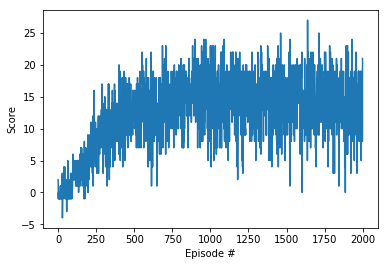

In [11]:
# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [13]:
torch.save(ddqn_agent.qnetwork_local.state_dict(), 'checkpoint_ddqn_banana.pth')

## Test-run the model

In [10]:
from double_dqn_agent import DoubleDqnAgent
ddqn_agent = DoubleDqnAgent(state_size=37, action_size=4, seed=0, fc1_size=64, fc2_size=64)
# load the weights from file
ddqn_agent.qnetwork_local.load_state_dict(torch.load('checkpoint_ddqn_banana.pth', map_location=lambda storage, loc: storage))

for i in range(3):
    env_info = env.reset(train_mode=False)[brain_name] # reset the environment
    state = env_info.vector_observations[0]            # get the current state
    score = 0                                          # initialize the score
    while True:
        action = ddqn_agent.act(state)
        env_info = env.step(action)[brain_name]        # send the action to the environment
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        score += reward                                # update the score
        state = next_state                             # roll over the state to next time step
        if done:                                       # exit loop if episode finished
            break
    print("Score: {}".format(score))

Score: 20.0
Score: 14.0
Score: 20.0


## End the environment

In [11]:
env.close()